# PCA - Principal Component Analysis

- PCA is a dimensionality reduction technique and helps us to reduce the number of features in a dataset,while keeping the most important information.
- PCA is an unsupervised learning technique because it finds patterns and structure in data without needing labeled outcomes  
 
- Reduces Complexity
- Finds Key Patterns
- Drop Noice


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the Dataset
data = pd.read_csv('wine.csv')
data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
# checking Null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
data.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [6]:
data[data.duplicated()]

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline


In [7]:
# Distribution of Data & Statistical info
data.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


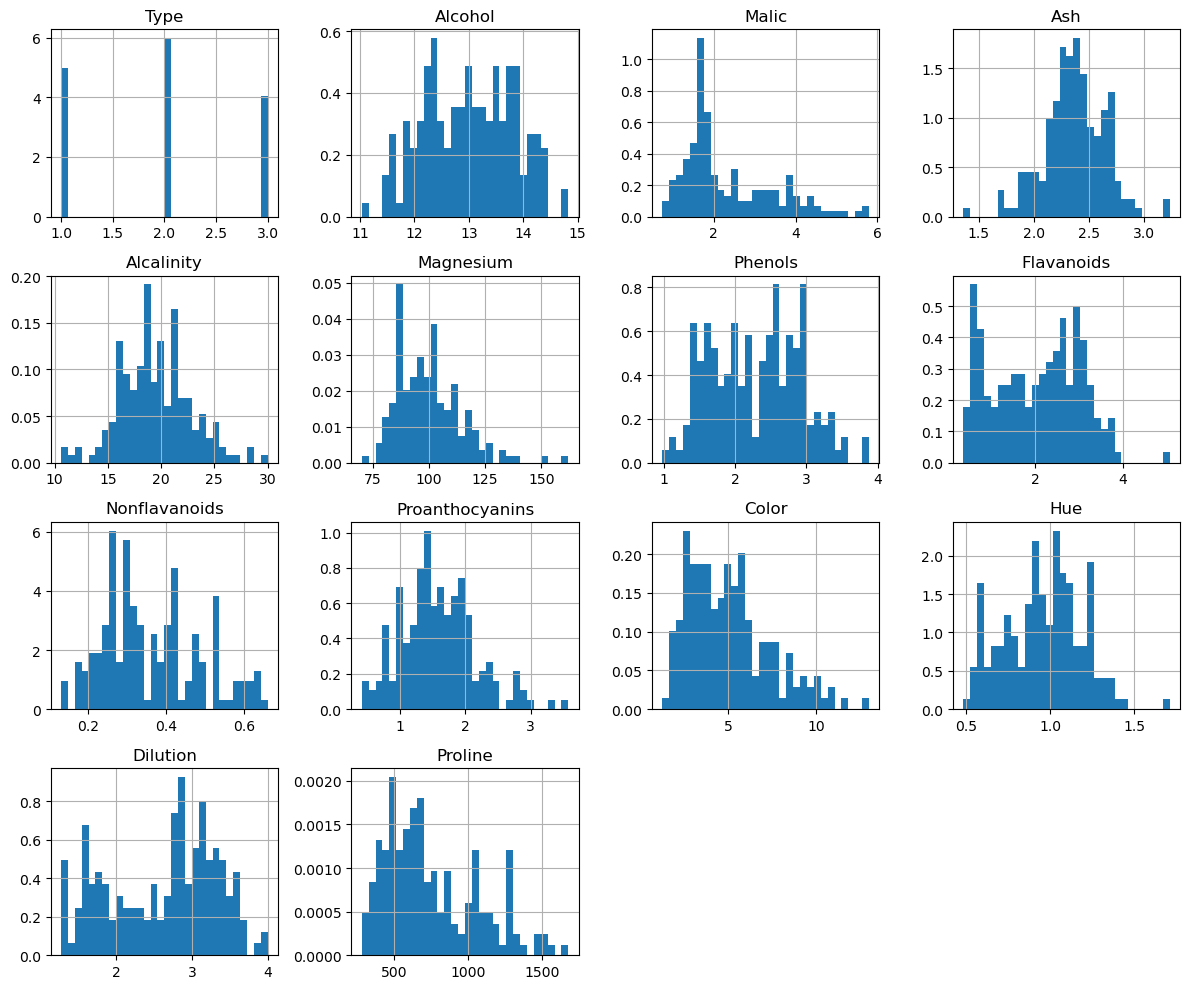

In [8]:
data.hist(bins=30, figsize=(12,10), density=True)
plt.tight_layout()
plt.show()

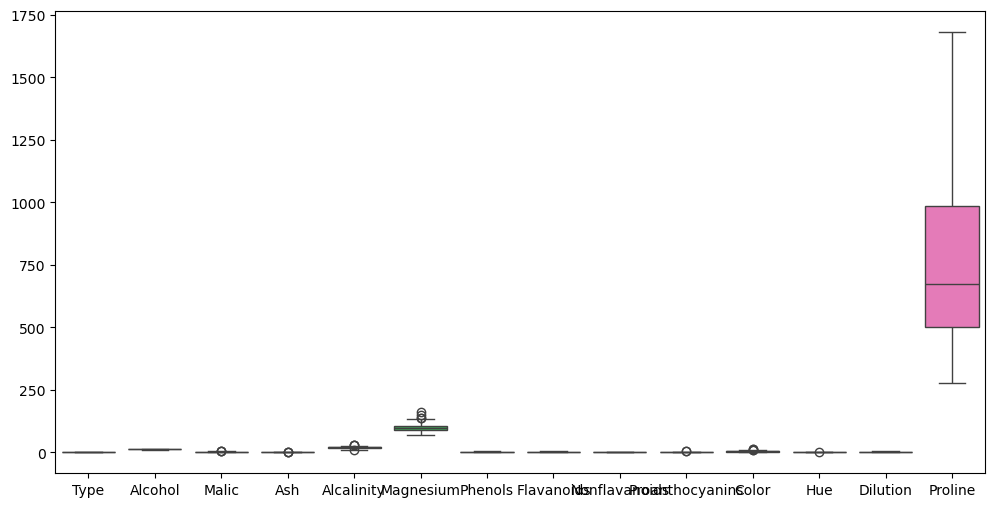

In [9]:
# checking Outliers
plt.figure(figsize=(12,6))
sns.boxplot(data)
plt.show()

In [10]:
# Cheking Correlation
data.corr()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Type,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoids,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


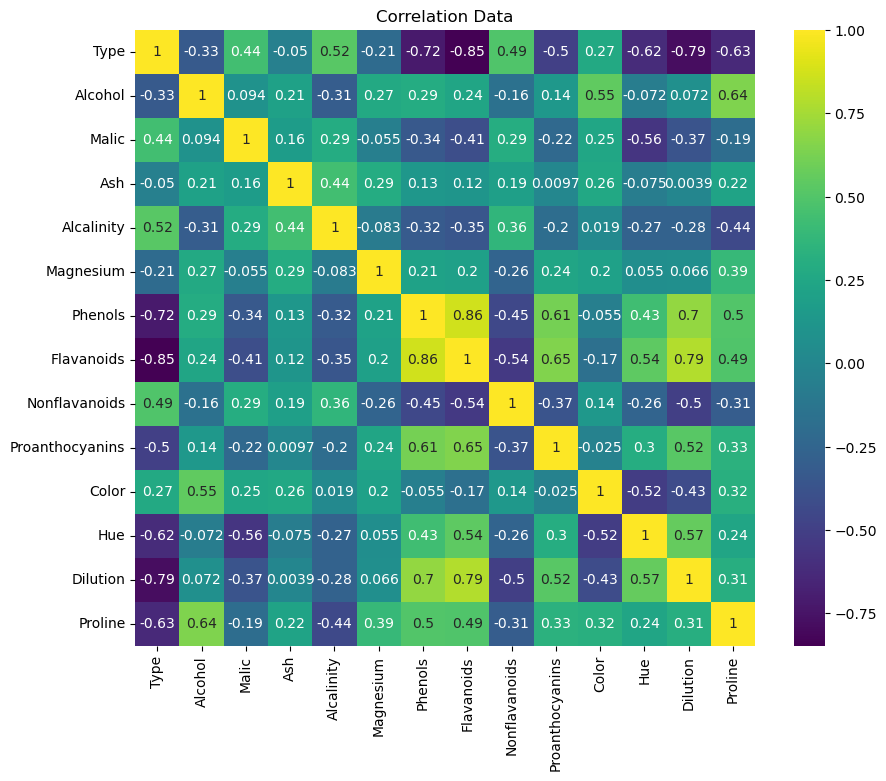

In [11]:
plt.figure(figsize=(10,8))
plt.title('Correlation Data')
sns.heatmap(data.corr(), annot=True, cmap='viridis')
plt.show()

# Scaling
- Removing 'Type' feature for scaling
- becz Type is class label, not a real numeric measurment
- if i did, scaling gives fale measurments.

In [12]:
X = data.drop(columns=['Type'])
y = data['Type']
X.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [13]:
# scaling - Standerd scaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


### Applying PCA

In [14]:
from sklearn.decomposition import PCA
pca = PCA()
pca_X= pca.fit_transform(X_scaled)

In [15]:
exp_var = pca.explained_variance_ratio_
exp_var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [16]:
np.cumsum(exp_var)

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116, 0.89336795, 0.92017544, 0.94239698, 0.96169717,
       0.97906553, 0.99204785, 1.        ])

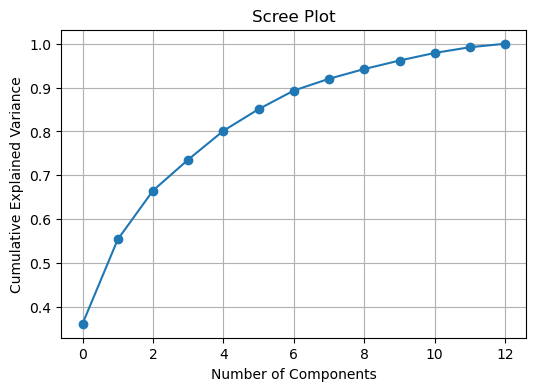

In [17]:
# Components

plt.figure(figsize=(6,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [18]:
n_components = np.argmax(np.cumsum(exp_var) >= 0.90) + 1
print('Number of n_components :',n_components)


Number of n_components : 8


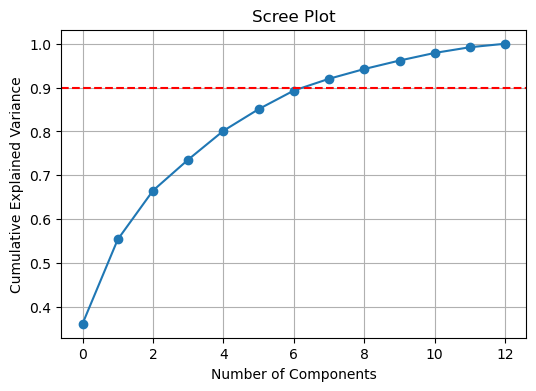

In [19]:
# Components

plt.figure(figsize=(6,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.axhline(y=0.90, color='r', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

#### Apply PCA with Principal Components

In [20]:
pca_n8 = PCA(n_components=8)
pca_final = pca_n8.fit_transform(X_scaled)
pca_final = pd.DataFrame(pca_final, columns=['PC1','PC2','PC3','PC4',
                                     'PC5','PC6','PC7','PC8'])
pca_final.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,3.316751,1.443463,-0.165739,-0.215631,0.693043,0.223880,0.596427,-0.065139
1,2.209465,-0.333393,-2.026457,-0.291358,-0.257655,0.927120,0.053776,-1.024416
2,2.516740,1.031151,0.982819,0.724902,-0.251033,-0.549276,0.424205,0.344216
3,3.757066,2.756372,-0.176192,0.567983,-0.311842,-0.114431,-0.383337,-0.643593
4,1.008908,0.869831,2.026688,-0.409766,0.298458,0.406520,0.444074,-0.416700


#### Clustering with ORIGINAL Data

## K-Means


- To find Best Cluster

#### Elbow Method (WCSS vs K)

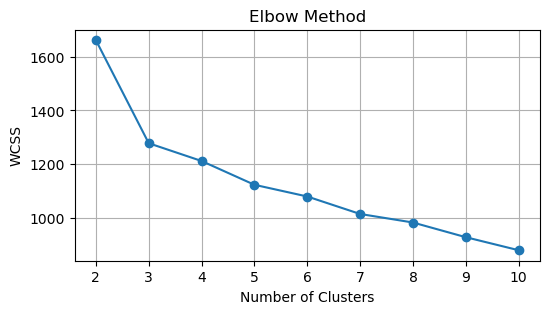

In [21]:
from sklearn.cluster import KMeans
wcss = []

for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    wcss.append(km.inertia_)

plt.figure(figsize=(6,3))
plt.plot(range(2,11), wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.grid(True)
plt.show()


- with above one, not clear to identify best Cluster K value,
- to identify using below methods for best K value

#### Silhouette Score Method

k=2, silhouette_scores=0.265
k=3, silhouette_scores=0.285
k=4, silhouette_scores=0.254
k=5, silhouette_scores=0.184
k=6, silhouette_scores=0.169
k=7, silhouette_scores=0.173
k=8, silhouette_scores=0.163
k=9, silhouette_scores=0.174
k=10, silhouette_scores=0.140
Best_silhout Score = 3


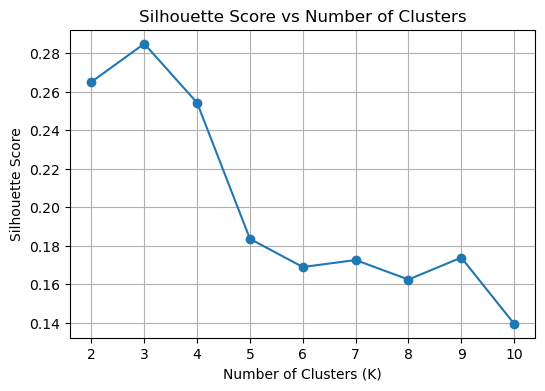

In [22]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

K_range = range(2, 11)   # Silhouette not defined for K=1

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)
    print(f"k={k}, silhouette_scores={score:.3f}")

# to find best score
best_score_sil = K_range[silhouette_scores.index(max(silhouette_scores))]
print('Best_silhout Score =',best_score_sil)


#visulaization
plt.figure(figsize=(6,4))
plt.plot(K_range, silhouette_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

#### Davies–Bouldin Index (DBI)

k=2, db_scores=0.140
k=3, db_scores=0.140
k=4, db_scores=0.140
k=5, db_scores=0.140
k=6, db_scores=0.140
k=7, db_scores=0.140
k=8, db_scores=0.140
k=9, db_scores=0.140
k=10, db_scores=0.140
Best_DB Score = 3


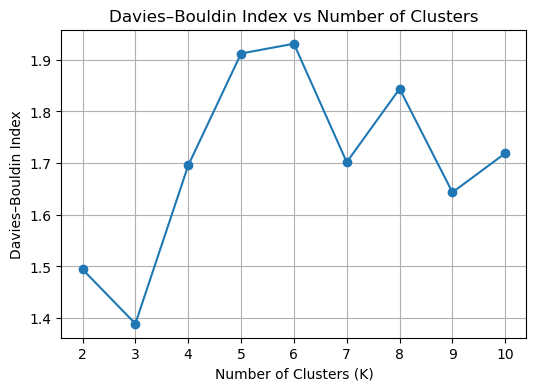

In [23]:
from sklearn.metrics import davies_bouldin_score

db_scores = []

K_range = range(2, 11)   # DBI not defined for K=1

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    db_index = davies_bouldin_score(X_scaled, labels)
    db_scores.append(db_index)
    print(f"k={k}, db_scores={score:.3f}")

# to find best score
best_db_score = K_range[db_scores.index(min(db_scores))]
print('Best_DB Score =',best_db_score)

plt.figure(figsize=(6,4))
plt.plot(K_range, db_scores, marker='o')
plt.title('Davies–Bouldin Index vs Number of Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Davies–Bouldin Index')
plt.grid(True)
plt.show()


#### Final Combined Decision on Original Data

In [24]:
print("Best K using Silhouette Score :", best_score_sil)
print("Best K using Davies-Bouldin  :", best_db_score)


Best K using Silhouette Score : 3
Best K using Davies-Bouldin  : 3


#### Train FINAL K-Means model (Final Model)

In [25]:
best_k = best_score_sil   # or the agreed K value

kmeans_final = KMeans(n_clusters=best_k, random_state=42)
final_labels = kmeans_final.fit_predict(X_scaled)


#### Evaluation

In [26]:
final_silhouette = silhouette_score(X_scaled, final_labels)
final_db = davies_bouldin_score(X_scaled, final_labels)

print("Final Silhouette Score :", final_silhouette)
print("Final Davies-Bouldin Index :", final_db)


Final Silhouette Score : 0.2848589191898987
Final Davies-Bouldin Index : 1.389187977718165


#### Cluster Visualization

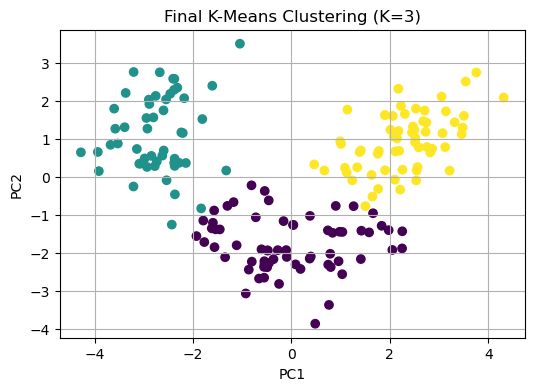

In [27]:
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(6,4))
plt.scatter(X_pca[:,0], X_pca[:,1], c=final_labels)
plt.title(f"Final K-Means Clustering (K={best_k})")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid()
plt.show()

#### Clustering with PCA Data

<function matplotlib.pyplot.show(close=None, block=None)>

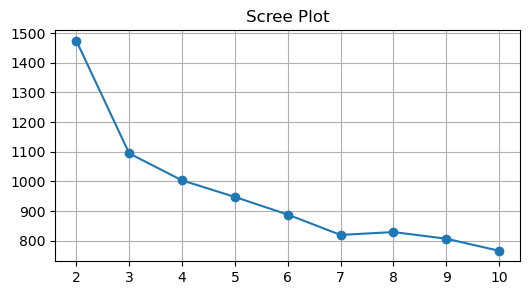

In [28]:
# Elbow Method (WCSS vs K)

wcss = []
k_range = range(2,11)
for k in k_range:
    km_pca = KMeans(n_clusters=k, random_state=42)
    km_pca.fit(pca_final)
    wcss.append(km_pca.inertia_)

plt.figure(figsize=(6,3))
plt.plot(k_range, wcss, marker='o')
plt.title('Scree Plot')
plt.grid()
plt.show

k=2, silhouette_score_pca=0.293
k=3, silhouette_score_pca=0.315
k=4, silhouette_score_pca=0.274
k=5, silhouette_score_pca=0.226
k=6, silhouette_score_pca=0.166
k=7, silhouette_score_pca=0.178
k=8, silhouette_score_pca=0.144
k=9, silhouette_score_pca=0.144
k=10, silhouette_score_pca=0.142
Best silhouete score = 3


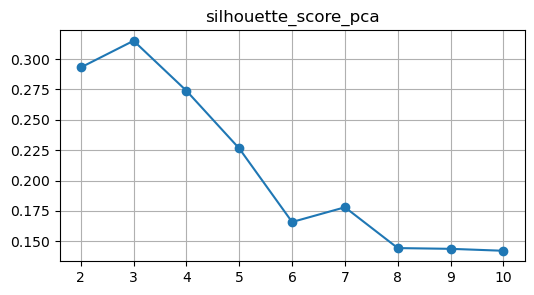

In [29]:
# silhouette score

silhouette_score_pca = []

for k in k_range:
    kmeans_pca = KMeans(n_clusters=k, random_state=42)
    labels = kmeans_pca.fit_predict(pca_final)
    score_pca = silhouette_score(pca_final, labels)
    silhouette_score_pca.append(score_pca)
    print(f"k={k}, silhouette_score_pca={score_pca:.3f}")

best_sil_pca_score = k_range[silhouette_score_pca.index(max(silhouette_score_pca))]
print('Best silhouete score =',best_sil_pca_score)

plt.figure(figsize=(6,3))
plt.plot(k_range, silhouette_score_pca, marker='o')
plt.title('silhouette_score_pca')
plt.grid()
plt.show()

k=2, dbdb_score_pca=1.355
k=3, dbdb_score_pca=1.267
k=4, dbdb_score_pca=1.588
k=5, dbdb_score_pca=1.723
k=6, dbdb_score_pca=1.857
k=7, dbdb_score_pca=1.718
k=8, dbdb_score_pca=1.508
k=9, dbdb_score_pca=1.547
k=10, dbdb_score_pca=1.543
best DB_score PCA = 3


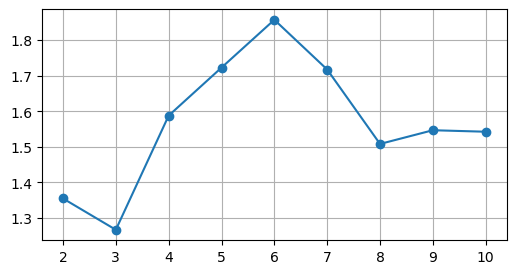

In [30]:
# davies_bouldin_score

db_score_pca = []

for k in k_range:
    kmeans_pca = KMeans(n_clusters=k, random_state=42)
    labels = kmeans_pca.fit_predict(pca_final)
    score_db = davies_bouldin_score(pca_final, labels)
    db_score_pca.append(score_db)
    print(f'k={k}, dbdb_score_pca={score_db:.3f}')

best_db_score_pca = k_range[db_score_pca.index(min(db_score_pca))]
print('best DB_score PCA =',best_db_score_pca)


plt.figure(figsize=(6,3))
plt.plot(k_range, db_score_pca, marker='o')
plt.grid()
plt.show()

In [31]:
# Comparison Results

print("Best K using Silhouette Score :", best_sil_pca_score)
print("Best K using Davies-Bouldin  :", best_db_score_pca)


Best K using Silhouette Score : 3
Best K using Davies-Bouldin  : 3


In [32]:
# Train FINAL K-Means model (Final Model)

best_k = best_sil_pca_score   # or the agreed K value

kmeans_final_pca = KMeans(n_clusters=best_k, random_state=42)
final_labels_pca = kmeans_final_pca.fit_predict(pca_final)


#### Evaluation

In [33]:
final_silhouette_PCA = silhouette_score(pca_final, final_labels_pca)
final_db_PCA = davies_bouldin_score(pca_final, final_labels_pca)

print("Final Silhouette Score :", final_silhouette_PCA)
print("Final Davies-Bouldin Index :", final_db_PCA)


Final Silhouette Score : 0.3149696954705562
Final Davies-Bouldin Index : 1.2668818314972177


#### Cluster visualization

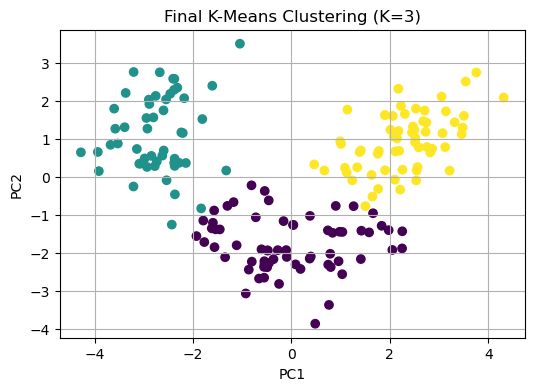

In [34]:
X_pca_final = pca.fit_transform(pca_final)

plt.figure(figsize=(6,4))
plt.scatter(X_pca_final[:,0], X_pca_final[:,1], c=final_labels_pca)
plt.title(f"Final K-Means Clustering (K={best_k})")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid()
plt.show()

In [35]:
### Final Validation scores for Both Original & PCA Data

final_silhouette = silhouette_score(X_scaled, final_labels)
final_db = davies_bouldin_score(X_scaled, final_labels)

print('Original Data')
print("Final Silhouette Score :", final_silhouette)
print("Final Davies-Bouldin Index :", final_db)

final_silhouette_PCA = silhouette_score(pca_final, final_labels_pca)
final_db_PCA = davies_bouldin_score(pca_final, final_labels_pca)

print('PCA Data')
print("Final Silhouette Score :", final_silhouette_PCA)
print("Final Davies-Bouldin Index :", final_db_PCA)



Original Data
Final Silhouette Score : 0.2848589191898987
Final Davies-Bouldin Index : 1.389187977718165
PCA Data
Final Silhouette Score : 0.3149696954705562
Final Davies-Bouldin Index : 1.2668818314972177


In [36]:
Validation_Results = pd.DataFrame({'DataSet':['Original','PCA'],
                                   'Silhouette score':[final_silhouette,final_silhouette_PCA],
                                   'DB_Score':[final_db,final_db_PCA]})
Validation_Results

,DataSet,Silhouette score,DB_Score
0,Original,0.284859,1.389188
1,PCA,0.314970,1.266882


### Conclusion

- Optimal clusters: 3
- PCA components: 8 (90% variance)
- Clearly separated clusters
- Validated by 3 metrics
- PCA reduced dimensionality while preserving 90% variance.
- K-Means clustering performed better on PCA-transformed data.
- PCA improved cluster compactness and separation.
- Using PCA before clustering is recommended for high-dimensional data.